In [41]:
"""
V0: Creation
V1: New exercise: Recursive Function 
Objectives:
    a) Load a Data Frame
    b) Basic Data Frame Manipulation
    C) Basic Visualization
Please notice that the provided files are given in .xls (DATA on DLO)
1. Find a way to translate those files to .csv (not necesarily in Python)
2. Rename Flight 1 to flight_csv.csv
3. Follow the rest of this file.

@author: Alejandro Murrieta-Mendoza
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [42]:

##============================================================================
## Exercise 1
## Using the command read_csv and the help information (which can be found in
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
## load the file flight_csv.csv.
## use print(data_frame.head()) to visualize your data
##============================================================================

df = pd.read_csv(os.path.abspath("./flight_csv.csv"))
print(df.columns)



Index(['Time (secs)', '[3d Latitude]', '[3d Longitude]', '[3d Altitude M]',
       '[3d Altitude Ft]', '[3d Heading]', 'GROSS WEIGHT (KG)', 'WIND SPEED',
       'CAPT PITCH ATT', 'RIGHT ENG N2 TACHO', 'RIGHT ENG N1 TACHO',
       'N1 #2 COMMAND INDICATED', 'N1 #1 COMMAND INDICATED',
       'TE FLAP POSN - RIGHT', 'TE FLAP POSN - LEFT', 'FLAP 4 EXTEND',
       'FLAP 3 EXTEND', 'FLAP 2 EXTEND', 'FLAP 1 EXTEND', 'FLAP HANDLE POSN',
       'Flap Handle Selection', 'WIND DIRECTION TRUE',
       'SELECTED FUEL FLOW #2 (KG)', 'SELECTED FUEL FLOW #1 (KG)',
       'RIGHT MAIN FUEL QTY (KG)', 'LEFT MAIN FUEL QTY (KG)',
       'CENTER MAIN FUEL QTY (KG)', 'AUX TANK FUEL QTY ( KG)',
       'TRUE AIRSPEED (derived)', 'V2 SPEED', 'V1 SPEED', 'TOTAL AIR TEMP',
       'MACH', 'IAS DISPLAY', 'CAPT GROUNDSPEED', 'COMPUTED AIRSPEED',
       'PRES POSN LONG', 'PRES POSN LAT', 'WIND DIRECTION TRUE.1'],
      dtype='object')


/tmp/ipykernel_74306/3078653462.py:9: DtypeWarning: Columns (6,7,9,10,11,12,13,14,19,20,21,22,23,24,25,26,27,28,31,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.abspath("./flight_csv.csv"))


In [43]:
##============================================================================
## Exercise 2
## Observe your variables in your data frame. Giving the goal of your assignment.
## Is there any variable (column) that you can drop (erase/remove) to make
## your dataframe a bit smaller? If so, drop it.
## It is always a good practicer to NEVER alter your original dataframe.
## For this reason, make a copy of your data frame and read how to drop columns
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
## For your assignment you should analyse what variables from your data frame
## are useful.
##============================================================================



In [44]:

##============================================================================
## Exercise 3
## For the rest of excercises, just leave the columns [3d Latitude],
## [3d Latitude]','[3d Longitude]','[3d Altitude Ft].
## Names are long and cumbersome. Once you have selected those values from
## the dataframe, rename them to LAT, LON, and ALT.
## Hint: df.rename()
## Print the first 10 values and the last 10 values. head() and tail() could
## be useful
## Also look at the functio df.describe() ##============================================================================

df = df.loc[
    :,
    [
        "[3d Latitude]",
        "[3d Longitude]",
        "[3d Altitude Ft]",
    ],
]
df = df.rename(columns={"[3d Latitude]": "lat", "[3d Longitude]": "lon", "[3d Altitude Ft]": "alt"})
df.head()
df.describe()

,lat,lon,alt
count,3.523700e+04,35237.000000,35237.000000
mean,9.656951e+33,2.746451,20529.886043
std,1.812757e+36,1.336038,17393.092188
min,0.000000e+00,0.000000,-4.000000
25%,4.145737e+01,2.292324,21.000000
50%,4.551291e+01,2.732148,23136.700000
75%,5.013959e+01,3.431822,39034.100000
max,3.402820e+38,4.847054,39198.400000


In [45]:

##============================================================================
## Exercise 4
## You may have noticed that there are values such as (lat,lon) = (0,0). This is
## evidently not correct. It might be because the navigation tool was not yet
## activated. Go ahead and remove those values from your dataframe.
## use .describe() and verify the max and min LAT,LON values.
## Do they make sense? What about the Altitude at Schiphol? Is the max altitude
## during flight realistic?
## When working with data sets it is always important to ask these questions.
## If you do not know, it is time to ask an expert about typical values.
## You can as well use the function .drop_duplicates() after to remove the
## The duplicated vales
##============================================================================

df = df[(df["lat"] > 0) & (df['lon'] > 0)]
df.describe()


,lat,lon,alt
count,3.097600e+04,30976.000000,30976.000000
mean,1.098534e+34,3.124248,23351.052864
std,1.933420e+36,0.922051,16682.771624
min,4.129765e+01,2.076619,-4.000000
25%,4.257660e+01,2.456673,3085.150000
50%,4.667639e+01,2.816485,30845.150000
75%,5.064227e+01,3.848758,39043.800000
max,3.402820e+38,4.847054,39198.400000


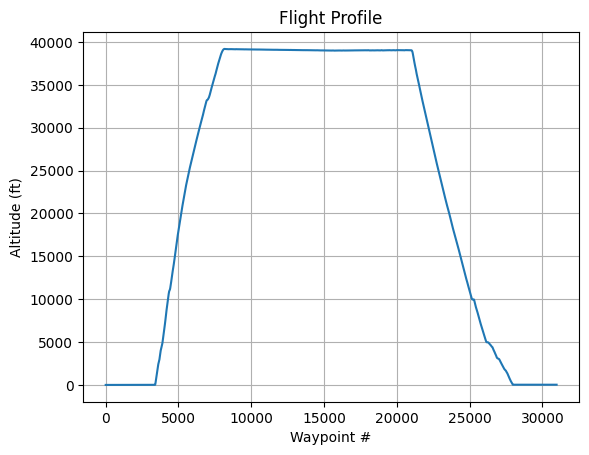

In [46]:

##============================================================================
## Exercise 5
## Great, now we have a "clean" dataframe. Let us see how it looks like.
## Plot your altitude agains the waypoint #. (or the row index)
## What do you observe? (Do not read Exericse 6 just yet. Think about it)
##============================================================================
def plot_alt(df):
       fig, ax = plt.subplots()
       ax.plot(df.alt[:])
       ax.set(xlabel='Waypoint #', ylabel='Altitude (ft)',
              title='Flight Profile')
       ax.grid()
       plt.show()
plot_alt(df)

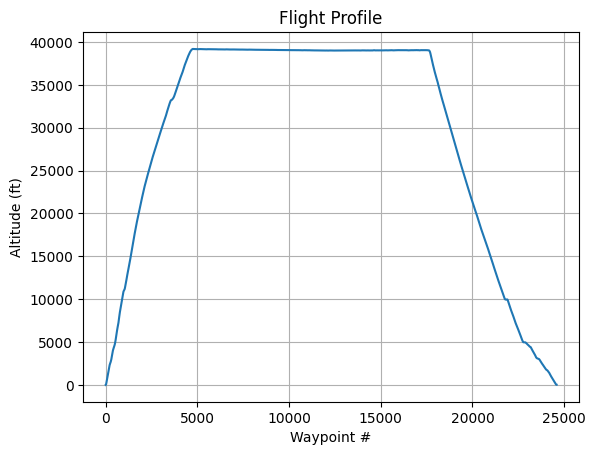

In [47]:
##============================================================================
## Exercise 6
## You have tought about it?
## Then you have noticed that the first and the last
## waypoints are always at the same altitude . Why is that? Should you remove them?
## Just for fun let's remove them and plot the data again
## You might want to explore PANDASERIES.to_frame(), Transpose x.T
## and pd.conct(....).reset_index(drop = True) or any other way you might know
##============================================================================

df = df[(df['alt'] != 21) & (df['alt'] != -4)].reset_index(drop=True)

df.head()
plot_alt(df)

In [48]:


##============================================================================
## Exercise 7
## As we are interested in the cruise only. Extract the cruise part from the
## Data frame. You might want to create new data frames for every flight phase.
## Plot the cruise phase
##============================================================================


##============================================================================
## Exercise 8
## It looks ugly now, does not it? These are real flights, it is hard to keep
## exact altitude. That is also the reason why there is vertical separation,
## to account for this errors. Extend the plot scale to reduce this effect.
## Hint: ax.set_ylim()
##============================================================================


##============================================================================
## Exercise 9
## Use the complete flight data (Ex 6) set and using vincenty, compute the total
## flight distance taking all points into account. Measure the computation time
## Create a list where you can also store the distance between waypoints.
##============================================================================


##============================================================================
## Exercise 10
## you might encouter that your waypoints are too close togetheter.
## Select 10 waypoints (Plus the initial two for a total of 12)
## Compute the distance between those waypoints. They should be the same.
## Measure the computation time
##============================================================================

# begin_ = time.perf_counter()
# YOUR CODE
# end_ = time.perf_counter()
# total_time = end_ - begin_

##============================================================================
## Exercise 11
## load the dataset named flightaware.txt avaiable in DLO
## You guessed it. I just copy and pasted this data from flightaware in a
## .txt file.
## Load this file to python
## Clean it
## Plot the complete flight
##============================================================================


##============================================================================
## Exercise 12
## Recursive function: Function that calls itself
## Example:
##============================================================================
def down_to_number(initial, n):
    print(initial)
    if initial == n:
        return  # Terminate recursion (Let's get out of here)
    else:
        initial -= 1
        down_to_number(initial, n)  # Recursive call


# Observe the behaviour closely, pat attention to recursive call
down_to_number(initial=10, n=1)

# Do you understand what it is happening?

##============================================================================
## Exercise 13
## Recursive functions: Function that calls itself
## Now try to think how to solve the typical example
## Find the factorial of a given number n by using a recursive function.
## n! = n × (n – 1) × (n – 2) × … × 1
##============================================================================


## END OF WORKSHOP

"""
If you look at the raw data, you can oberve that data is sampled every 0.25 seconds.
Another way of cleaning the data is to pick only integer values, in other words,
To reduce the sampling by 1 second. They you can apply the filters and cleaning
as did in thi document. 


Why am i torturing you with the recursive function? 
It might be helpful to solve the first exercise of the next workshop.
At least i solve it with that :) 
    
# Cool tool to observe your orientation if on doubt
# https://www.desmos.com/calculator/3e7iypw4ow


"""


10
9
8
7
6
5
4
3
2
1


'\nIf you look at the raw data, you can oberve that data is sampled every 0.25 seconds.\nAnother way of cleaning the data is to pick only integer values, in other words,\nTo reduce the sampling by 1 second. They you can apply the filters and cleaning\nas did in thi document. \n\n\nWhy am i torturing you with the recursive function? \nIt might be helpful to solve the first exercise of the next workshop.\nAt least i solve it with that :) \n    \n# Cool tool to observe your orientation if on doubt\n# https://www.desmos.com/calculator/3e7iypw4ow\n\n\n'